<a href="https://colab.research.google.com/github/AndreyDyachkov/Data_analytics_with_Python/blob/main/03_telecom_data_statistical_analysis/3_EDA_and_hypotheses_testing_(Yandex_Practicum_eng).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Choosing the most profitable plan for a telecom company (EDA and statistical hypotheses testing)

<b>Task:</b>
We need to analyse user behaviour for two plans (Smart and Ultra) on a small sample of customers. Find out: Who are they? Where are they from? Which plan do they use? How many calls and messages did each of them make in 2018? Which plan brings more money? The analysis aim is to adjust an advertisement campaign. 
<br>
<b>Stakeholder: </b>
Marketing dept.
<br>
<b>Plan description: </b>
1. Plan "Smart"<br>
Monthly fee: 550 RUR<br>
Included: 500 minutes, 50 texts, and 15 Gb of data<br>
Out-of-bundle charges:
3 RUR per minute
3 RUR per text message
1 Gb of data: 200 RUR
<br>
2. Plan "Ultra"<br>
Monthly fee: 1950 RUR<br>
Included: 3000 minutes, 1000 texts, and 30Gb of data<br>
Out-of-bundle charges:
1 RUR per minute
1 RUR per text message
1 Gb of data: 150 RUR<br>
The company always rounds up minutes and Mb.
<br>

<b>Data description: </b><br>
5 csv files: users, calls, messages, internet, tariffs.

### Stage 1. Getting data, checking dataset

#### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Getting data

In [3]:
calls = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Y_Praktikum/data/calls.csv')
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [4]:
internet = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Y_Praktikum/data/internet.csv')
internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [5]:
messages = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Y_Praktikum/data/messages.csv')
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [6]:
tariffs = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Y_Praktikum/data/tariffs.csv')
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [7]:
users = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Y_Praktikum/data/users.csv')
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


All the tables are without visible mistakes

#### Processing missing values and checking data types

We are going to join the tables, so let's check primary keys for unique values as well.

##### calls

In [8]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [9]:
calls.isnull().mean()

id           0.0
call_date    0.0
duration     0.0
user_id      0.0
dtype: float64

In [10]:
calls['id'].duplicated().sum()

0

No duplicates. No missing values. Let's convert the call_date data type to datetime.

In [11]:
calls['call_date']= pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  float64       
 3   user_id    202607 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB


##### internet

In [12]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [13]:
internet.isnull().mean()

Unnamed: 0      0.0
id              0.0
mb_used         0.0
session_date    0.0
user_id         0.0
dtype: float64

In [14]:
internet['id'].duplicated().sum()

0

No duplicates. No missing values. Let's change the session_date data type to datetime.

In [15]:
internet['session_date']= pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Unnamed: 0    149396 non-null  int64         
 1   id            149396 non-null  object        
 2   mb_used       149396 non-null  float64       
 3   session_date  149396 non-null  datetime64[ns]
 4   user_id       149396 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 5.7+ MB


##### messages

In [16]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [17]:
messages.isnull().mean()

id              0.0
message_date    0.0
user_id         0.0
dtype: float64

In [18]:
messages['id'].duplicated().sum()

0

No duplicates. No missing values. Let's convert the message_date data type to datetime.

In [19]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            123036 non-null  object        
 1   message_date  123036 non-null  datetime64[ns]
 2   user_id       123036 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


##### tariffs

In [20]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [21]:
tariffs.isnull().mean()

messages_included        0.0
mb_per_month_included    0.0
minutes_included         0.0
rub_monthly_fee          0.0
rub_per_gb               0.0
rub_per_message          0.0
rub_per_minute           0.0
tariff_name              0.0
dtype: float64

No duplicates. No missing values. Primary key: tariff_name.

##### users

In [22]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [23]:
users.isnull().mean()

user_id       0.000
age           0.000
churn_date    0.924
city          0.000
first_name    0.000
last_name     0.000
reg_date      0.000
tariff        0.000
dtype: float64

In [24]:
users['user_id'].duplicated().sum()

0

No duplicates. There are missing values in the churn_date column. According to the data description, if the value is missing, the plan was active at the time the data were downloaded. We will leave missing data and change the data type to datetime.

In [25]:
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')

In [26]:
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   age         500 non-null    int64         
 2   churn_date  38 non-null     datetime64[ns]
 3   city        500 non-null    object        
 4   first_name  500 non-null    object        
 5   last_name   500 non-null    object        
 6   reg_date    500 non-null    datetime64[ns]
 7   tariff      500 non-null    object        
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


<b>Results</b><br>
Summary: no duplicates, no missing values. The data type in date columns was changed to datetime. 
<br>In detail<br>
<b>Table users:</b><br>
> - user_id
> - first_name
> - last_name
> - age (years)
> - reg_date (plan activation date)  - changed to datetime.
> - churn_date (plan termination date) - changed to datetime. Active users do not have churn date. 
> - city 
> - tariff — plan name

<b>Table calls:</b><br>
> - id
> - call_date — changed to datetime
> - duration — call duration in minutes (float)
> - user_id

<b>Table messages:</b><br>
> - id
> - message_date — changed to datetime
> - user_id

<b>Table internet:</b><br>
> - Unnamed: 0 - looks like an index. Can be removed.
> - id
> - mb_used — the amount of data per session (in Mb)
> - session_date — changed to datetime
> - user_id

<b>Table tariffs:</b><br>
> - tariff_name — a plan name
> - rub_monthly_fee — a monthly fee (RUR)
> - minutes_included — the number of minutes included in the monthly fee
> - messages_included — the number of text messages included in the  monthly fee
> - mb_per_month_included — the amount of data included in the monthly fee (Mb)
> - rub_per_minute — excess charge for calls (RUR per minute)
> - rub_per_message — excess charge for messaging (RUR per message)
> - rub_per_gb — excess charge for data usage (RUR per 1 Gb (1024 Mb))

All the tables, except tariffs, are related via user_id. The tariffs table is connected through tariff-tariff_name.

### Stage 2. EDA. Distributions. Checking for errors.

#### calls

In [27]:
calls.describe()

,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


In [28]:
calls['call_date'].describe(datetime_is_numeric=True)

count                           202607
mean     2018-09-02 20:01:37.583992832
min                2018-01-01 00:00:00
25%                2018-07-05 00:00:00
50%                2018-09-17 00:00:00
75%                2018-11-14 00:00:00
max                2018-12-31 00:00:00
Name: call_date, dtype: object

The data is for the period from 2018-01-01 to 2018-12-31. The minimum call duration is equal to 0. Let's find out how many such entries we have.

In [29]:
calls[calls['duration']==0]['id'].count()

39613

In [30]:
calls[calls['duration']==0]['id'].count() / calls['id'].count()

0.19551644316336553

20% of rows have zero call duration. We will remove those rows as the company does not charge them. Also, we will round up minutes, as the company does the same.

In [31]:
#calls = calls[calls['duration']!=0]

or using query:

In [32]:
calls = calls.query('duration!=0')

In [33]:
calls['duration'] = np.ceil(calls['duration'])

<ipython-input-33-3c77a5fe74a6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calls['duration'] = np.ceil(calls['duration'])


Let's look at the distribution

In [34]:
calls.describe()

,duration,user_id
count,162994.000000,162994.000000
mean,8.897880,1254.149877
std,5.353761,144.751050
min,1.000000,1000.000000
25%,5.000000,1126.000000
50%,8.000000,1261.000000
75%,12.000000,1379.000000
max,38.000000,1499.000000


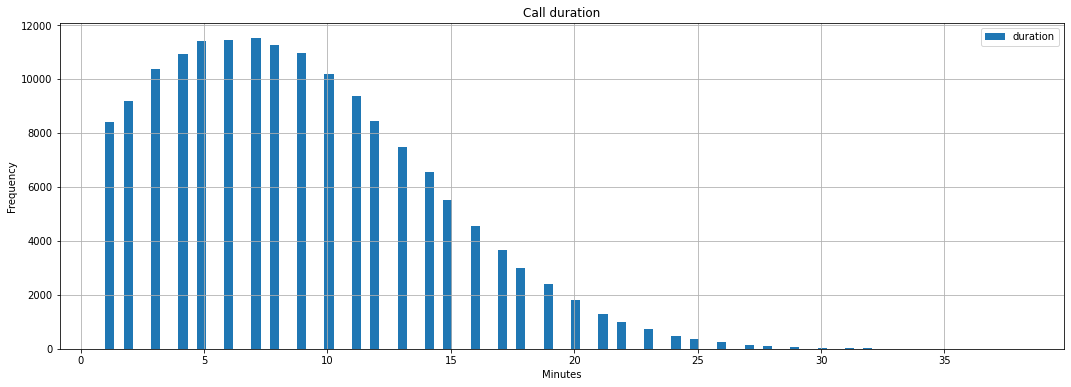

In [35]:
calls.plot(kind='hist', y='duration', bins=100, grid=True, figsize=(18,6), title='Call duration')
plt.xlabel('Minutes')
plt.ylabel('Frequency')
plt.show()

Removing rows with zero values increased the mean from 6.8 to 8.9 and reduced the standard deviation from 5.8 to 5.3. The distribution looks like  Poisson, which looks good for call duration. Let's add the month column for further analysis.

In [36]:
calls['month'] = calls['call_date'].dt.month

It works well as we have the data only for one year. However, it would cause mistakes in larger data sets. Let's add one more column for month using astype('datetime64[M]').

In [37]:
calls['year_month'] = calls['call_date'].astype('datetime64[M]')

In [38]:
calls.head()

,id,call_date,duration,user_id,month,year_month
2,1000_2,2018-06-11,3.0,1000,6,2018-06-01
3,1000_3,2018-09-21,14.0,1000,9,2018-09-01
4,1000_4,2018-12-15,6.0,1000,12,2018-12-01
7,1000_7,2018-08-22,19.0,1000,8,2018-08-01
8,1000_8,2018-09-15,19.0,1000,9,2018-09-01


#### internet

In [39]:
internet.describe()

,Unnamed: 0,mb_used,user_id
count,149396.000000,149396.000000,149396.000000
mean,74697.500000,370.192426,1252.099842
std,43127.054745,278.300951,144.050823
min,0.000000,0.000000,1000.000000
25%,37348.750000,138.187500,1130.000000
50%,74697.500000,348.015000,1251.000000
75%,112046.250000,559.552500,1380.000000
max,149395.000000,1724.830000,1499.000000


In [40]:
internet['session_date'].describe(datetime_is_numeric=True)

count                           149396
mean     2018-09-02 12:55:35.221826560
min                2018-01-01 00:00:00
25%                2018-07-05 00:00:00
50%                2018-09-17 00:00:00
75%                2018-11-14 00:00:00
max                2018-12-31 00:00:00
Name: session_date, dtype: object

The data is for the period from 2018-01-01 to 2018-12-31. Minimum data usage is equal to 0. Let's check.

In [41]:
internet[internet['mb_used']==0]['id'].count()

19598

In [42]:
internet[internet['mb_used']==0]['id'].count() / internet['id'].count()

0.13118155773916304

13% of entries have zero value. Let's remove those rows and round up mb_used.

In [43]:
#internet = internet[internet['mb_used']!=0]

using query:

In [44]:
internet = internet.query('mb_used!=0')

In [45]:
internet['mb_used'] = np.ceil(internet['mb_used'])

<ipython-input-45-404048a52ce5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  internet['mb_used'] = np.ceil(internet['mb_used'])


Let's look at what we get.

In [46]:
internet.describe()

,Unnamed: 0,mb_used,user_id
count,129798.000000,129798.000000,129798.000000
mean,74978.644879,426.581758,1253.046318
std,43047.137838,255.596114,143.782672
min,0.000000,1.000000,1000.000000
25%,37675.250000,228.000000,1132.000000
50%,75253.000000,401.000000,1252.000000
75%,112247.750000,593.000000,1380.000000
max,149395.000000,1725.000000,1499.000000


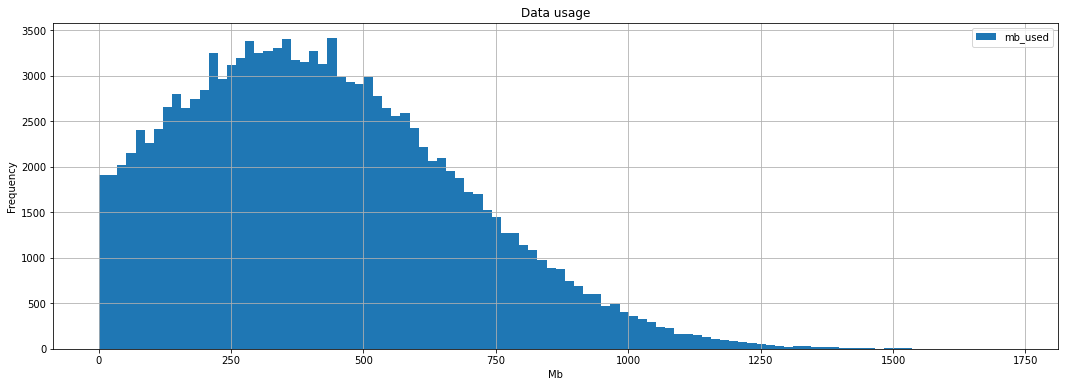

In [47]:
internet.plot(kind='hist', y='mb_used', bins=100, grid=True, figsize=(18,6), title='Data usage')
plt.xlabel('Mb')
plt.ylabel('Frequency')
plt.show()

Removing rows with zero values increased the mean from 370 to 427 and reduced the standard deviation from 278 to 256. For further analysis, we will add the month column.

In [48]:
internet['month'] = internet['session_date'].dt.month

Adding year-month-first_date column

In [49]:
internet['year_month'] = internet['session_date'].astype('datetime64[M]')

In [50]:
internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id,month,year_month
0,0,1000_0,113.0,2018-11-25,1000,11,2018-11-01
1,1,1000_1,1053.0,2018-09-07,1000,9,2018-09-01
2,2,1000_2,1198.0,2018-06-25,1000,6,2018-06-01
3,3,1000_3,551.0,2018-08-22,1000,8,2018-08-01
4,4,1000_4,303.0,2018-09-24,1000,9,2018-09-01


#### messages

In [51]:
messages['message_date'].describe()

<ipython-input-51-649bcd84e64a>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  messages['message_date'].describe()


count                  123036
unique                    364
top       2018-12-31 00:00:00
freq                      859
first     2018-01-02 00:00:00
last      2018-12-31 00:00:00
Name: message_date, dtype: object

The data is for the period from 2018-01-01 to 2018-12-31. Let's add the month column and the year-month column.

In [52]:
messages['month'] = messages['message_date'].dt.month

In [53]:
messages['year_month'] = messages['message_date'].astype('datetime64[M]')

In [54]:
messages.head()

,id,message_date,user_id,month,year_month
0,1000_0,2018-06-27,1000,6,2018-06-01
1,1000_1,2018-10-08,1000,10,2018-10-01
2,1000_2,2018-08-04,1000,8,2018-08-01
3,1000_3,2018-06-16,1000,6,2018-06-01
4,1000_4,2018-12-05,1000,12,2018-12-01


#### tariffs

In [55]:
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Nothing to explore

#### users

In [56]:
users.describe()

,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


In [57]:
users[['churn_date', 'reg_date']].describe(datetime_is_numeric=True)

,churn_date,reg_date
count,38,500
mean,2018-11-13 00:37:53.684210432,2018-06-30 18:57:35.999999744
min,2018-08-17 00:00:00,2018-01-01 00:00:00
25%,2018-10-14 00:00:00,2018-04-07 12:00:00
50%,2018-11-24 00:00:00,2018-07-02 12:00:00
75%,2018-12-15 12:00:00,2018-09-29 00:00:00
max,2018-12-30 00:00:00,2018-12-31 00:00:00


In [58]:
users[['first_name', 'last_name','city', 'tariff']].describe()

,first_name,last_name,city,tariff
count,500,500,500,500
unique,246,419,76,2
top,Радим,Андреенко,Москва,smart
freq,6,5,99,351


Let's drop the columns we don't need.

In [59]:
users.drop(['first_name', 'last_name', 'age'], axis=1, inplace=True)

In [60]:
users.head()

,user_id,churn_date,city,reg_date,tariff
0,1000,NaT,Краснодар,2018-05-25,ultra
1,1001,NaT,Москва,2018-11-01,smart
2,1002,NaT,Стерлитамак,2018-06-17,smart
3,1003,NaT,Москва,2018-08-17,ultra
4,1004,NaT,Новокузнецк,2018-05-14,ultra


<b>EDA results:</b> <br>
1. The distributions of call duration and traffic volume are non-normal.
2. The rows with zero values in the call duration and data traffic columns have been deleted, as they were not charged by the company.
3. After removing zero values the averages increased while the standard deviations decreased.

### Stage 3. Creating pivot tables to group data by customer and month 

#### Number of calls and call duration by month

In [61]:
calls_stat = calls.pivot_table(index=['user_id','year_month'], values=['duration'], aggfunc=['count', 'sum'])
calls_stat

count      sum
                   duration duration
user_id year_month                  
1000    2018-05-01       17    159.0
        2018-06-01       28    172.0
        2018-07-01       41    340.0
        2018-08-01       42    408.0
        2018-09-01       46    466.0
...                     ...      ...
1498    2018-10-01       30    247.0
1499    2018-09-01        8     70.0
        2018-10-01       44    449.0
        2018-11-01       62    612.0
        2018-12-01       56    492.0

[3168 rows x 2 columns]

#### Number of text messages per customer per month

In [62]:
messages_stat = messages.pivot_table(index=['user_id','year_month'], values=['id'], aggfunc='count')
messages_stat

id
user_id year_month    
1000    2018-05-01  22
        2018-06-01  60
        2018-07-01  75
        2018-08-01  81
        2018-09-01  57
...                 ..
1498    2018-10-01  42
1499    2018-09-01  11
        2018-10-01  48
        2018-11-01  59
        2018-12-01  66

[2717 rows x 1 columns]

#### Data usage per user per month

In [63]:
internet_stat = internet.pivot_table(index=['user_id','year_month'], values=['mb_used'], aggfunc='sum')
internet_stat

mb_used
user_id year_month         
1000    2018-05-01   2256.0
        2018-06-01  23257.0
        2018-07-01  14016.0
        2018-08-01  14070.0
        2018-09-01  14581.0
...                     ...
1498    2018-10-01  20604.0
1499    2018-09-01   1848.0
        2018-10-01  17809.0
        2018-11-01  17984.0
        2018-12-01  13077.0

[3201 rows x 1 columns]

#### Monthly revenue for each user


Revenue = (total number of calls/texts/Mb - free limits for calls/texts/Mb)*tariffs for calls/texts/Mb + monthly fee for Smart/Ultra)

We will merge pivot tables by their indexes using an outer join as we can assume that not all customers used those services every month.

In [64]:
stat_final = calls_stat.join([internet_stat, messages_stat], how='outer').reset_index()
stat_final.columns = ['user_id', 'year_month', 'count_calls', 'calls_duration', 'mb_used', 'count_messages']
stat_final.head()

,user_id,year_month,count_calls,calls_duration,mb_used,count_messages
0,1000,2018-05-01,17.0,159.0,2256.0,22.0
1,1000,2018-06-01,28.0,172.0,23257.0,60.0
2,1000,2018-07-01,41.0,340.0,14016.0,75.0
3,1000,2018-08-01,42.0,408.0,14070.0,81.0
4,1000,2018-09-01,46.0,466.0,14581.0,57.0


Let's check for missing values (when users didn't use the service).

In [65]:
stat_final.isnull().sum()

user_id             0
year_month          0
count_calls        46
calls_duration     46
mb_used            13
count_messages    497
dtype: int64

We found a few missing values. Let's fill in with 0 (0 calls, 0 texts, 0 Mb) using a for loop.

In [66]:
column_names = ['count_calls','calls_duration','mb_used','count_messages']
for name in column_names:
    stat_final[name] = stat_final[name].fillna(0)
stat_final.isnull().sum()

user_id           0
year_month        0
count_calls       0
calls_duration    0
mb_used           0
count_messages    0
dtype: int64

Then we need to add data from the tariff table. To do this, we will merge the tariff table with the users table and then merge with the stat_final table. We will include all user_id from users in the stat_final table and check how many users did not use services at all.

In [67]:
users = pd.merge(users, tariffs, left_on='tariff', right_on='tariff_name')
users.head()

,user_id,churn_date,city,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,1000,NaT,Краснодар,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
1,1003,NaT,Москва,2018-08-17,ultra,1000,30720,3000,1950,150,1,1,ultra
2,1004,NaT,Новокузнецк,2018-05-14,ultra,1000,30720,3000,1950,150,1,1,ultra
3,1013,NaT,Иваново,2018-11-14,ultra,1000,30720,3000,1950,150,1,1,ultra
4,1016,NaT,Омск,2018-11-21,ultra,1000,30720,3000,1950,150,1,1,ultra


In [68]:
stat_final = pd.merge(stat_final, users, left_on='user_id', right_on='user_id', how='right')
stat_final.head()

,user_id,year_month,count_calls,calls_duration,mb_used,count_messages,churn_date,city,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,1000,2018-05-01,17.0,159.0,2256.0,22.0,NaT,Краснодар,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
1,1000,2018-06-01,28.0,172.0,23257.0,60.0,NaT,Краснодар,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
2,1000,2018-07-01,41.0,340.0,14016.0,75.0,NaT,Краснодар,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
3,1000,2018-08-01,42.0,408.0,14070.0,81.0,NaT,Краснодар,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
4,1000,2018-09-01,46.0,466.0,14581.0,57.0,NaT,Краснодар,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra


In [69]:
stat_final[stat_final['year_month'].isnull()]

,user_id,year_month,count_calls,calls_duration,mb_used,count_messages,churn_date,city,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
243,1128,NaT,NaN,NaN,NaN,NaN,2018-12-23,Волжский,2018-12-15,ultra,1000,30720,3000,1950,150,1,1,ultra
2619,1371,NaT,NaN,NaN,NaN,NaN,2018-12-30,Омск,2018-12-25,smart,50,15360,500,550,200,3,3,smart


There were no records in the data tables for two customers. Both have a short period between reg_date and churn_date. Let's delete those entries.

In [70]:
stat_final = stat_final[~stat_final['year_month'].isnull()]
stat_final.head()

,user_id,year_month,count_calls,calls_duration,mb_used,count_messages,churn_date,city,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,1000,2018-05-01,17.0,159.0,2256.0,22.0,NaT,Краснодар,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
1,1000,2018-06-01,28.0,172.0,23257.0,60.0,NaT,Краснодар,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
2,1000,2018-07-01,41.0,340.0,14016.0,75.0,NaT,Краснодар,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
3,1000,2018-08-01,42.0,408.0,14070.0,81.0,NaT,Краснодар,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
4,1000,2018-09-01,46.0,466.0,14581.0,57.0,NaT,Краснодар,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra


Let's calculate extra minutes, texts and Mb in separate columns. (0 means  there is no excess)

In [71]:
stat_final['extra_minutes'] = stat_final['calls_duration'] - stat_final['minutes_included']
stat_final.loc[stat_final['extra_minutes'] < 0, 'extra_minutes'] = 0
stat_final.head()

,user_id,year_month,count_calls,calls_duration,mb_used,count_messages,churn_date,city,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,extra_minutes
0,1000,2018-05-01,17.0,159.0,2256.0,22.0,NaT,Краснодар,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra,0.0
1,1000,2018-06-01,28.0,172.0,23257.0,60.0,NaT,Краснодар,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra,0.0
2,1000,2018-07-01,41.0,340.0,14016.0,75.0,NaT,Краснодар,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra,0.0
3,1000,2018-08-01,42.0,408.0,14070.0,81.0,NaT,Краснодар,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra,0.0
4,1000,2018-09-01,46.0,466.0,14581.0,57.0,NaT,Краснодар,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra,0.0


In [72]:
stat_final['extra_messages'] = stat_final['count_messages'] - stat_final['messages_included']
stat_final.loc[stat_final['extra_messages'] < 0, 'extra_messages'] = 0
stat_final.head()

,user_id,year_month,count_calls,calls_duration,mb_used,count_messages,churn_date,city,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,extra_minutes,extra_messages
0,1000,2018-05-01,17.0,159.0,2256.0,22.0,NaT,Краснодар,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra,0.0,0.0
1,1000,2018-06-01,28.0,172.0,23257.0,60.0,NaT,Краснодар,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra,0.0,0.0
2,1000,2018-07-01,41.0,340.0,14016.0,75.0,NaT,Краснодар,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra,0.0,0.0
3,1000,2018-08-01,42.0,408.0,14070.0,81.0,NaT,Краснодар,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra,0.0,0.0
4,1000,2018-09-01,46.0,466.0,14581.0,57.0,NaT,Краснодар,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra,0.0,0.0


In [73]:
stat_final['extra_mb_used'] = stat_final['mb_used'] - stat_final['mb_per_month_included']
stat_final.loc[stat_final['extra_mb_used'] < 0, 'extra_mb_used'] = 0
stat_final.head()

,user_id,year_month,count_calls,calls_duration,mb_used,count_messages,churn_date,city,reg_date,tariff,...,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,extra_minutes,extra_messages,extra_mb_used
0,1000,2018-05-01,17.0,159.0,2256.0,22.0,NaT,Краснодар,2018-05-25,ultra,...,30720,3000,1950,150,1,1,ultra,0.0,0.0,0.0
1,1000,2018-06-01,28.0,172.0,23257.0,60.0,NaT,Краснодар,2018-05-25,ultra,...,30720,3000,1950,150,1,1,ultra,0.0,0.0,0.0
2,1000,2018-07-01,41.0,340.0,14016.0,75.0,NaT,Краснодар,2018-05-25,ultra,...,30720,3000,1950,150,1,1,ultra,0.0,0.0,0.0
3,1000,2018-08-01,42.0,408.0,14070.0,81.0,NaT,Краснодар,2018-05-25,ultra,...,30720,3000,1950,150,1,1,ultra,0.0,0.0,0.0
4,1000,2018-09-01,46.0,466.0,14581.0,57.0,NaT,Краснодар,2018-05-25,ultra,...,30720,3000,1950,150,1,1,ultra,0.0,0.0,0.0


Revenue (Mb are converted to Gb and round up).

In [74]:
stat_final['revenue'] = stat_final['rub_monthly_fee'] \
                      + stat_final['extra_minutes'] * stat_final['rub_per_minute'] \
                      + stat_final['extra_messages'] * stat_final['rub_per_message'] \
                      + np.ceil(stat_final['extra_mb_used']/1024) * stat_final['rub_per_gb']

In [75]:
stat_final.head()

,user_id,year_month,count_calls,calls_duration,mb_used,count_messages,churn_date,city,reg_date,tariff,...,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,extra_minutes,extra_messages,extra_mb_used,revenue
0,1000,2018-05-01,17.0,159.0,2256.0,22.0,NaT,Краснодар,2018-05-25,ultra,...,3000,1950,150,1,1,ultra,0.0,0.0,0.0,1950.0
1,1000,2018-06-01,28.0,172.0,23257.0,60.0,NaT,Краснодар,2018-05-25,ultra,...,3000,1950,150,1,1,ultra,0.0,0.0,0.0,1950.0
2,1000,2018-07-01,41.0,340.0,14016.0,75.0,NaT,Краснодар,2018-05-25,ultra,...,3000,1950,150,1,1,ultra,0.0,0.0,0.0,1950.0
3,1000,2018-08-01,42.0,408.0,14070.0,81.0,NaT,Краснодар,2018-05-25,ultra,...,3000,1950,150,1,1,ultra,0.0,0.0,0.0,1950.0
4,1000,2018-09-01,46.0,466.0,14581.0,57.0,NaT,Краснодар,2018-05-25,ultra,...,3000,1950,150,1,1,ultra,0.0,0.0,0.0,1950.0


Let's check for missing values in revenue.

In [76]:
stat_final['revenue'].isnull().sum()

0

<b>Result:</b>
We pivoted data and created the table with revenue for each user.

### Stage 4. Pivoted data analysis (users behaviour, average call duration, number of text messages, data usage for each plan)

Let's create a pivot table with all measures and calculate mean, variance and standard deviation.

In [77]:
stat_final.pivot_table(index='tariff', values=['calls_duration', 'count_messages', 'mb_used'], aggfunc=['count', 'mean', 'var','std'])

count                                  mean                 \
       calls_duration count_messages mb_used calls_duration count_messages   
tariff                                                                       
smart            2229           2229    2229     417.934948      33.384029   
ultra             985            985     985     526.623350      49.363452   

                                var                               \
             mb_used calls_duration count_messages       mb_used   
tariff                                                             
smart   16229.188425   36219.315784     796.812958  3.454591e+07   
ultra   19486.901523  100873.633397    2285.266143  1.019356e+08   

                  std                               
       calls_duration count_messages       mb_used  
tariff                                              
smart      190.313730      28.227876   5877.576978  
ultra      317.606098      47.804457  10096.317202

<b>Results:</b>
1. The average duration differs significantly between plans: 418 +/- 190 minutes per month in Smart vs 527 +/- 317 minutes per month in Ultra. In Ultra users talk, on average,  26% longer.
2. The average number of messages in Ultra is 48% higher (49 +/- 47 in Ultra vs 33 +/- 28 in Smart)
3. The average amount of data traffic in Ultra is 20% greater (19487 +/- 10096 Mb in Ultra vs 16229 +/- 5877 Mb in Smart)

Distrbutions

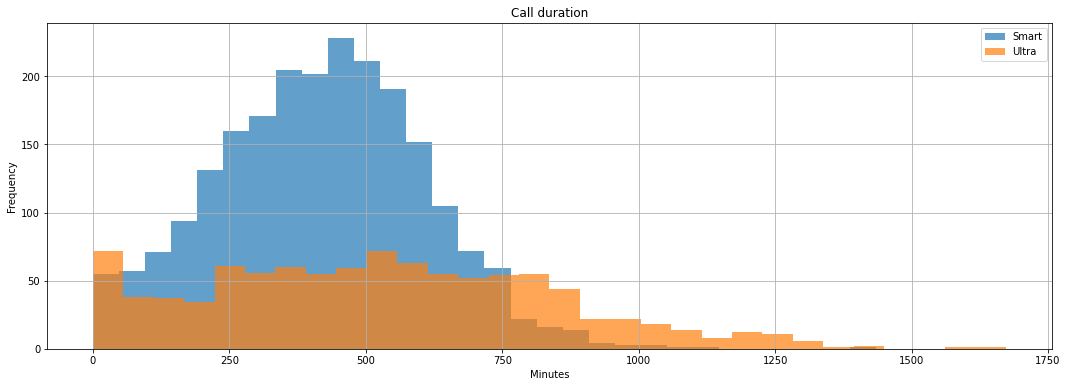

In [78]:
plt.figure(figsize=(18, 6))
plt.title('Call duration')
plt.grid(True)
plt.hist(stat_final[stat_final['tariff']=='smart']['calls_duration'], label = 'Smart', bins=30, alpha=0.7)
plt.hist(stat_final[stat_final['tariff']=='ultra']['calls_duration'], label = 'Ultra', bins=30, alpha=0.7)
plt.legend()
plt.xlabel('Minutes')
plt.ylabel('Frequency')
plt.show()

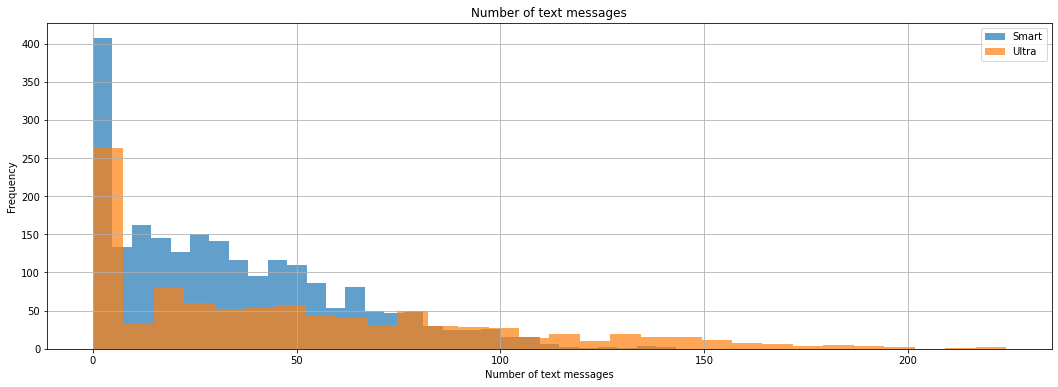

In [79]:
plt.figure(figsize=(18, 6))
plt.title('Number of text messages')
plt.grid(True)
plt.hist(stat_final[stat_final['tariff']=='smart']['count_messages'], label = 'Smart', bins=30, alpha=0.7)
plt.hist(stat_final[stat_final['tariff']=='ultra']['count_messages'], label = 'Ultra', bins=30, alpha=0.7)
plt.legend()
plt.xlabel('Number of text messages')
plt.ylabel('Frequency')
plt.show()

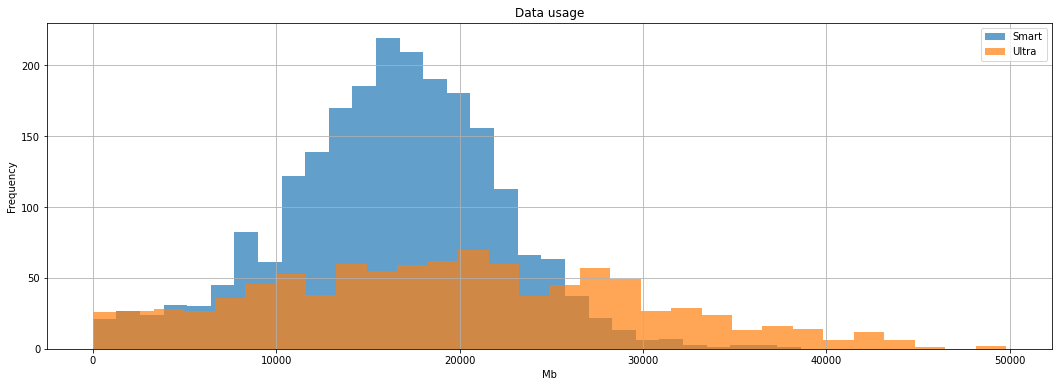

In [80]:
plt.figure(figsize=(18, 6))
plt.title('Data usage')
plt.grid(True)
plt.hist(stat_final[stat_final['tariff']=='smart']['mb_used'], label = 'Smart', bins=30, alpha=0.7)
plt.hist(stat_final[stat_final['tariff']=='ultra']['mb_used'], label = 'Ultra', bins=30, alpha=0.7)
plt.legend()
plt.xlabel('Mb')
plt.ylabel('Frequency')
plt.show()

<b>Results:</b>
The distribution of minutes and megabytes in the Smart plan is more or less normal, while the Ultra plan has a large spread of values. Distributions of the number of messages are non-normal in both plans, however, in the Ultra plan, the spread of values is also larger. There is a lot of zero values ​​in calls and especially in messages.

### Stage 4. Testing hypotheses
- Hypothesis 1: The average revenue in Ultra and Smart plans differs;
- Hypothesis 2: The average revenue in Moscow differs from the revenue in other regions.

 #### The average revenue in Ultra and Smart plans differs

Let's calculate the difference

In [81]:
stat_final.pivot_table(index='tariff', values='revenue', aggfunc=['mean', 'std', 'median'])

,mean,std,median
,revenue,revenue,revenue
tariff,,,
smart,1294.63930,820.933202,1038.0
ultra,2071.06599,378.802377,1950.0


Revenue in Ultra is 60% higher than in Smart (2071 +/- 379 vs 1295 +/- 821)
<br>We will use Student's test with the significance level of 0.05. Null hypothesis: the means are equal. Alternative hypothesis: the means are not equal.
<br> Let's split the sample by plan and compare

In [82]:
alpha = 0.05
sample_smart = stat_final[stat_final['tariff']=='smart']
sample_ultra = stat_final[stat_final['tariff']=='ultra']

Variances

In [83]:
revenue_var_smart = np.var(sample_smart['revenue'])
revenue_var_smart

673628.974426787

In [84]:
revenue_var_ultra = np.var(sample_ultra['revenue'])
revenue_var_ultra

143345.5641732588

The variances differ by a factor of 5.

The Levene test (The small p-value suggests that the populations do not have equal variances)

In [85]:
from scipy.stats import levene

In [86]:
stat, p = levene(sample_smart['revenue'], sample_ultra['revenue'])
print('p-value:', p)
if p < alpha:
    print("We reject the null hypothesis - the sample variances are different")
else:
    print("We do not reject the null hypothesis - the sample variances are the same")

p-value: 1.6855369377883898e-124
We reject the null hypothesis - the sample variances are different


Bartlett’s test for variances (The small p-value suggests that the populations do not have equal variances)

In [87]:
from scipy.stats import bartlett

In [88]:
stat, p = bartlett(sample_smart['revenue'], sample_ultra['revenue'])
print('p-value:', p)
if p < alpha:
    print("We reject the null hypothesis - the sample variances are different")
else:
    print("We do not reject the null hypothesis - the sample variances are the same")

p-value: 3.0026968510287354e-140
We reject the null hypothesis - the sample variances are different


We found that the variances are very different, so we will set equal_var = False

In [89]:
results = st.ttest_ind(sample_smart['revenue'], sample_ultra['revenue'], equal_var=False)
print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We do not reject the null hypothesis")

p-value: 2.7240946993530856e-246
We reject the null hypothesis


<b>Result:</b> 
The average revenue in the Ultra plan is significantly higher than the average revenue in the Smart plan.

#### The average revenue in Moscow differs from the revenue in other regions

Let's split the dataset into 2 samples and compare.

In [90]:
sample_moscow = stat_final[stat_final['city']=='Москва']
sample_non_moscow = stat_final[stat_final['city']!='Москва']

In [91]:
sample_moscow['revenue'].describe()

count     611.000000
mean     1550.805237
std       752.451347
min       550.000000
25%       798.000000
50%      1750.000000
75%      1950.000000
max      5321.000000
Name: revenue, dtype: float64

In [92]:
sample_non_moscow['revenue'].describe()

count    2603.000000
mean     1528.316942
std       810.411374
min       550.000000
25%       750.000000
50%      1587.000000
75%      1950.000000
max      6770.000000
Name: revenue, dtype: float64

Revenue in Moscow 1550 +/- 752, other regions 1528 +/- 810. The difference is small, and the standard deviations are large. There is likely no statistically significant difference.
We will use Student's test, with the significance level set equal to 0.05. Null hypothesis: the means are equal. Alternative hypothesis: the means are not equal.

Variances

In [93]:
revenue_var_moscow = np.var(sample_moscow['revenue'])
revenue_var_moscow

565256.3794161058

In [94]:
revenue_var_non_moscow = np.var(sample_non_moscow['revenue'])
revenue_var_non_moscow

656514.2841040562

The Levene test

In [95]:
stat, p = levene(sample_moscow['revenue'], sample_non_moscow['revenue'])
print('p-value:', p)
if p < alpha:
    print("We reject the null hypothesis - the sample variances are different")
else:
    print("We do not reject the null hypothesis - the sample variances are the same")

p-value: 0.009373921759468934
We reject the null hypothesis - the sample variances are different


The difference between the variances does not seem to be very large, but the Levene test for the similarity of the variances showed the difference. Therefore, we will add the equal_var=False parameter and look at the result of the Student's test.

In [96]:
results = st.ttest_ind(sample_moscow['revenue'], sample_non_moscow['revenue'], equal_var=False)
print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We do not reject the null hypothesis")

p-value: 0.5126564657748214
We do not reject the null hypothesis


<b>Results:</b> There is no statistically significant difference between the average revenue in Moscow and other regions.

<b>Conclusion on testing hypotheses:</b>
1. Ultra plan average revenue is higher than that of the Smart plan, the difference is statistically significant.
2. There is no statistically significant difference between the average revenue in Moscow and other regions.

### Conclusion

The Ultra plan brings more money in terms of higher revenue. 
The call duration in the Ultra plan was, on average, 26% higher than in the  Smart plan. Furthermore, the average number of messages and the average data usage in the Ultra plan are 48% and 20% higher, respectively. The Ultra plan average revenue is 60% higher, and the difference is statistically significant. As for the difference between Moscow and other regions, we haven't found any statistically significant results.